In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [5]:
data = np.load('neutrino0523n1000000.npz')

In [6]:
data.files

['ve_dune',
 'vu_dune',
 'vebar_dune',
 'vubar_dune',
 've_t2hk',
 'vu_t2hk',
 'vebar_t2hk',
 'vubar_t2hk',
 'theta12',
 'theta13',
 'theta23',
 'delta',
 'sdm',
 'ldm',
 'octant',
 'cpv',
 'mo']

In [7]:
# Spectrum
print(data['vubar_dune'][0])
print(len(data['vubar_dune'][0]))

[541.674  396.838  246.335   23.6712  65.6252  72.1417 116.961  149.214
 158.037  143.366  122.784   93.6693  72.3489  50.7155  36.4625  26.1384
  22.1587  21.1114  24.4607  27.7871  32.2228  38.8     42.2139  46.0486
  49.1345  50.8979  52.4287  52.5664  51.5727  50.6953  49.0621  46.1008
  43.1184  41.4272  38.3154  35.9337  34.0358  30.5295  28.788   27.3376
  25.4654  23.9236  22.1883  21.2489  19.9045  18.6868  18.0744  17.1862
  16.5536  15.8684]
50


In [8]:
# Label
print("octant label",data['octant'])
print("cpv label",data['cpv'])
print("mo label",data['mo'])

octant label [-1. -1. -1. ...  1. -1. -1.]
cpv label [0. 1. 0. ... 0. 1. 0.]
mo label [ 1.  1.  1. ... -1.  1.  1.]


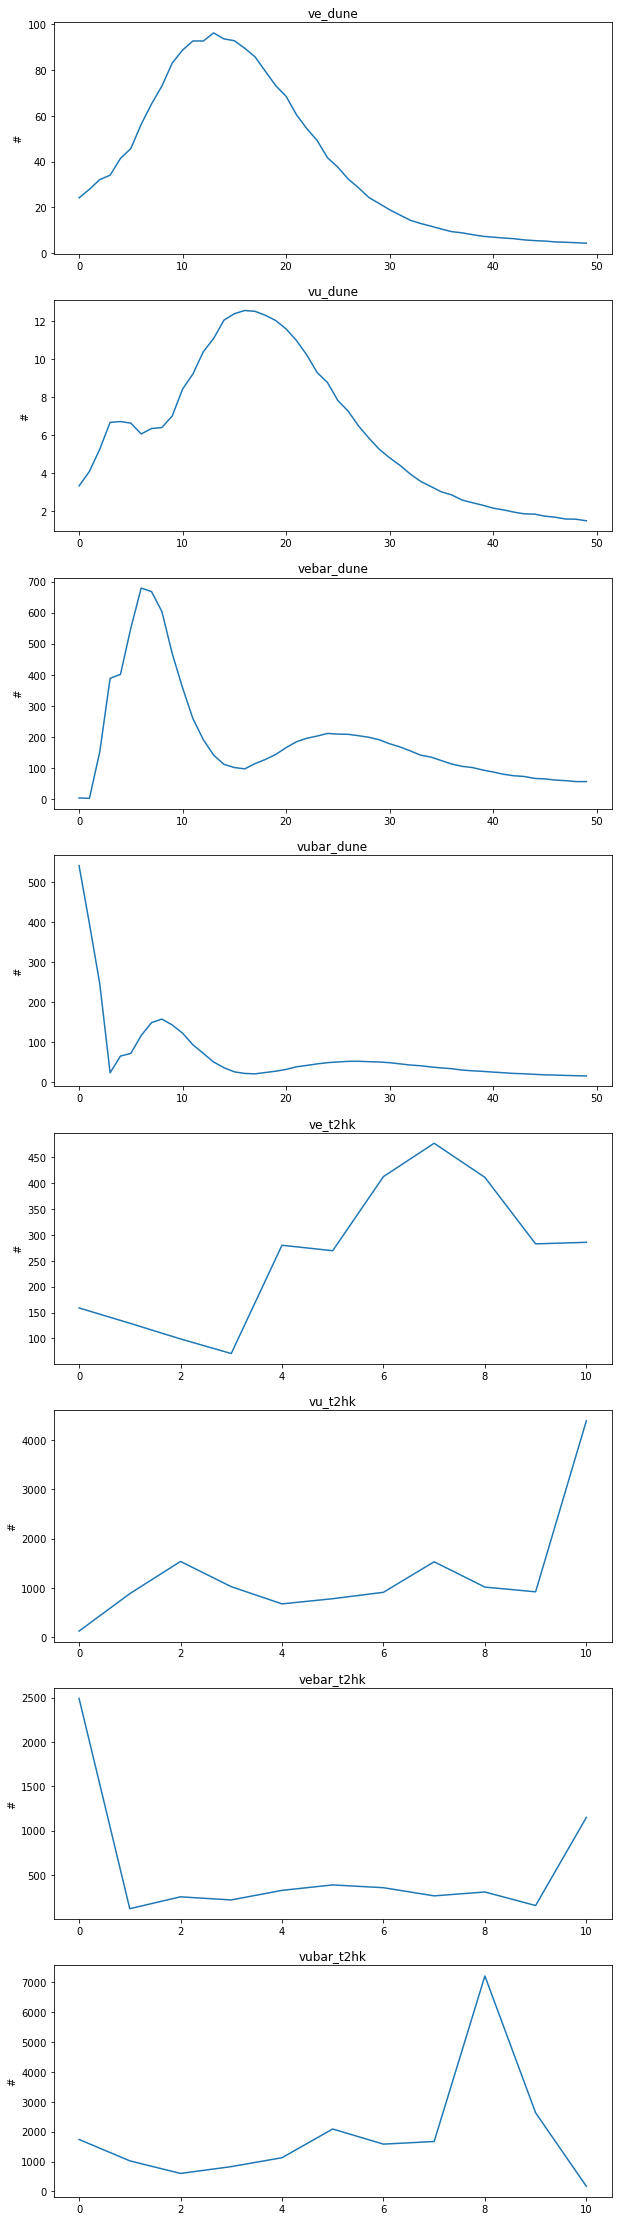

In [9]:
# Spectrum 
plt.figure(figsize = (10,40))
feature = ['ve_dune','vu_dune','vebar_dune','vubar_dune','ve_t2hk','vu_t2hk','vebar_t2hk','vubar_t2hk']
n = 0
for i in feature:
    n = n+1
    plt.subplot(len(feature),1,n)
    plt.xlabel('')
    plt.ylabel('#')
    y = data[i][0]
    x = range(len(y))
    plt.plot(x,y)
    plt.title(i)


In [10]:
# Splitting 
n = 10000

cpv = data['cpv'][:n]

ve_dune = data['ve_dune'][:n]
vu_dune = data['vu_dune'][:n]
vebar_dune = data['vebar_dune'][:n]
vubar_dune = data['vubar_dune'][:n]


ve_t2hk = data['ve_t2hk'][:n]
vu_t2hk = data['vu_t2hk'][:n]
vebar_t2hk = data['vebar_t2hk'][:n]
vubar_t2hk = data['vubar_t2hk'][:n]

ve2_dune = np.hstack((ve_dune,vebar_dune))[:n] #合併ve和ve_bar
ve2_t2hk = np.hstack((ve_t2hk,vebar_t2hk))[:n] #合併ve和ve_bar
ve4 = np.hstack((ve_dune,vebar_dune,ve_t2hk,vebar_t2hk))[:n] #合併ve和ve_bar


from sklearn.model_selection import train_test_split
ve_dune_train, ve_dune_test, cpv_train_ve_dune, cpv_test_ve_dune = train_test_split(ve_dune, cpv, test_size=0.10, random_state=32)
vu_dune_train, vu_dune_test, cpv_train_vu_dune, cpv_test_vu_dune = train_test_split(vu_dune, cpv, test_size=0.10, random_state=32)
vebar_dune_train, vebar_dune_test, cpv_train_vebar_dune, cpv_test_vebar_dune = train_test_split(vebar_dune, cpv, test_size=0.10, random_state=32)
vubar_dune_train, vubar_dune_test, cpv_train_vubar_dune, cpv_test_vubar_dune = train_test_split(vubar_dune, cpv, test_size=0.10, random_state=32)


ve_t2hk_train, ve_t2hk_test, cpv_train_ve_t2hk, cpv_test_ve_t2hk = train_test_split(ve_t2hk, cpv, test_size=0.10, random_state=32)
vu_t2hk_train, vu_t2hk_test, cpv_train_vu_t2hk, cpv_test_vu_t2hk = train_test_split(vu_t2hk, cpv, test_size=0.10, random_state=32)
vebar_t2hk_train, vebar_t2hk_test, cpv_train_vebar_t2hk, cpv_test_vebar_t2hk = train_test_split(vebar_t2hk, cpv, test_size=0.10, random_state=32)
vubar_t2hk_train, vubar_t2hk_test, cpv_train_vubar_t2hk, cpv_test_vubar_t2hk = train_test_split(vubar_t2hk, cpv, test_size=0.10, random_state=32)

ve2_dune_train, ve2_dune_test, cpv_train_ve2_dune, cpv_test_ve2_dune = train_test_split(ve2_dune, cpv, test_size=0.10, random_state=32)
ve2_t2hk_train, ve2_t2hk_test, cpv_train_ve2_t2hk, cpv_test_ve2_t2hk = train_test_split(ve2_t2hk, cpv, test_size=0.10, random_state=32)
ve4_train, ve4_test, cpv_train_ve4, cpv_test_ve4 = train_test_split(ve4, cpv, test_size=0.10, random_state=32)



In [11]:
#取出CPV=0/1的spectrum的第一個bin
first_bins_cpv0 = []
for i in range(len(ve_dune[cpv == 0])):
    first_bins_cpv0.append(ve_dune[cpv == 0][i][0])
first_bins_cpv1 = []
for i in range(len(ve_dune[cpv == 1])):
    first_bins_cpv1.append(ve_dune[cpv == 1][i][0])

Text(0.5, 1.0, 'first bins (cpv=1)')

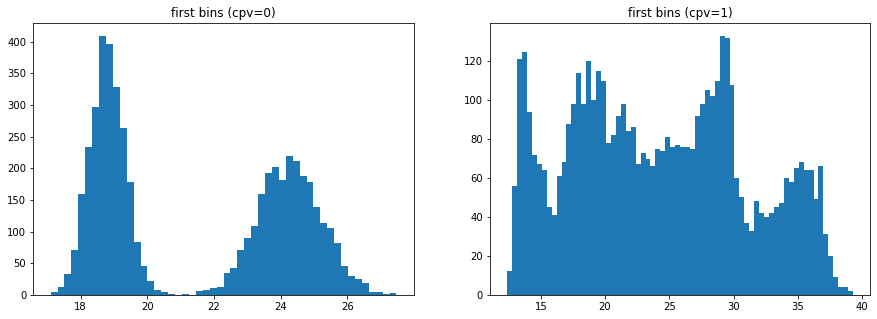

In [12]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.hist(first_bins_cpv0,bins=50)
plt.title('first bins (cpv=0)')
plt.subplot(1,2,2)
plt.hist(first_bins_cpv1,bins=70)
plt.title('first bins (cpv=1)')

In [13]:
print("ve_t2hk_train",ve_t2hk_train.shape)
print("ve_t2hk_test",ve_t2hk_test.shape)
print("cpv_train_ve_t2hk",cpv_train_ve_t2hk.shape)
print("cpv_test_ve_t2hk",cpv_test_ve_t2hk.shape)

ve_t2hk_train (9000, 11)
ve_t2hk_test (1000, 11)
cpv_train_ve_t2hk (9000,)
cpv_test_ve_t2hk (1000,)


Training Score:  0.9605555555555556
Testing Score:  0.956


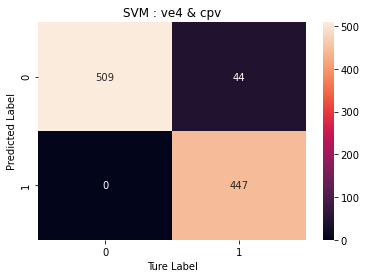

In [14]:
# SVM : Spectrum ve4 & cpv

#Choose Spectrum type
v_train = ve4_train
cpv_train = cpv_train_ve4
v_test = ve4_test
cpv_test = cpv_test_ve4

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : ve4 & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Text(0.5, 1.0, 'cpv=0')

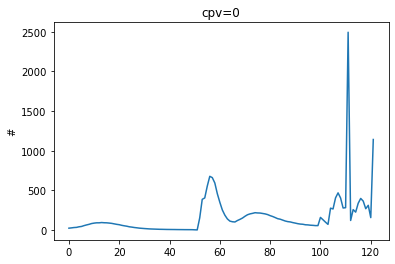

In [15]:
v_test_0 = v_test[cpv_pred_svm == 0]

plt.xlabel('')
plt.ylabel('#')
y = v_test_0[0]
x = range(len(y))
plt.plot(x,y)
plt.title('cpv=0')

Text(0.5, 1.0, 'cpv=1')

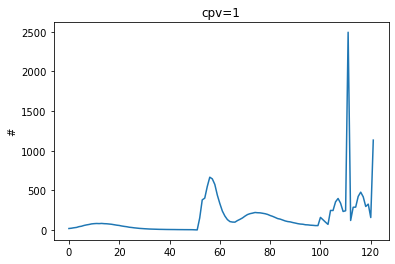

In [16]:
v_test_1 = v_test[cpv_pred_svm == 1]

plt.xlabel('')
plt.ylabel('#')
y = v_test_1[0]
x = range(len(y))
plt.plot(x,y)
plt.title('cpv=1')

In [17]:
index_01 = []
index_10 = []
for i in range(len(cpv_test)):
    if cpv_test[i] ==0 and cpv_pred_svm[i] == 1:
        index_01.append(i)
    if cpv_test[i] ==1 and cpv_pred_svm[i] == 0:
        index_10.append(i)

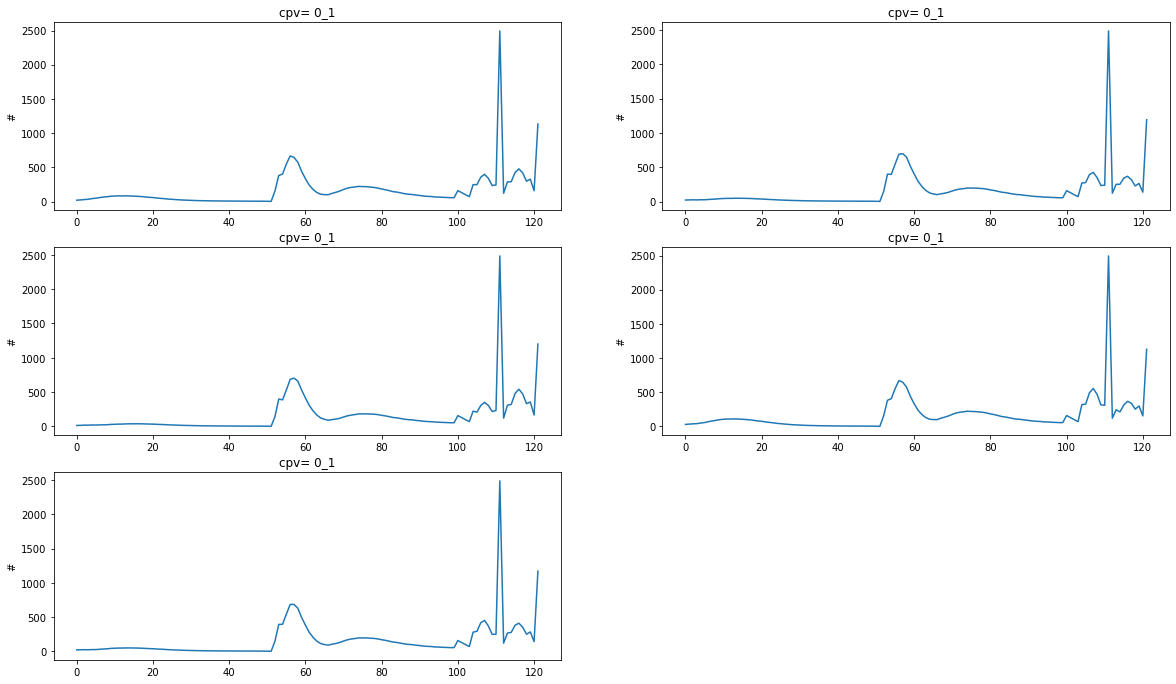

In [18]:
v_test_01 = v_test[index_01]
n = 5
plt.figure(figsize = (20,20))
for i in range(n):    
    plt.subplot(n,2,i+1)
    plt.xlabel('')
    plt.ylabel('#')
    y = v_test_1[i]
    x = range(len(y))
    plt.plot(x,y)
    plt.title('cpv= 0_1')

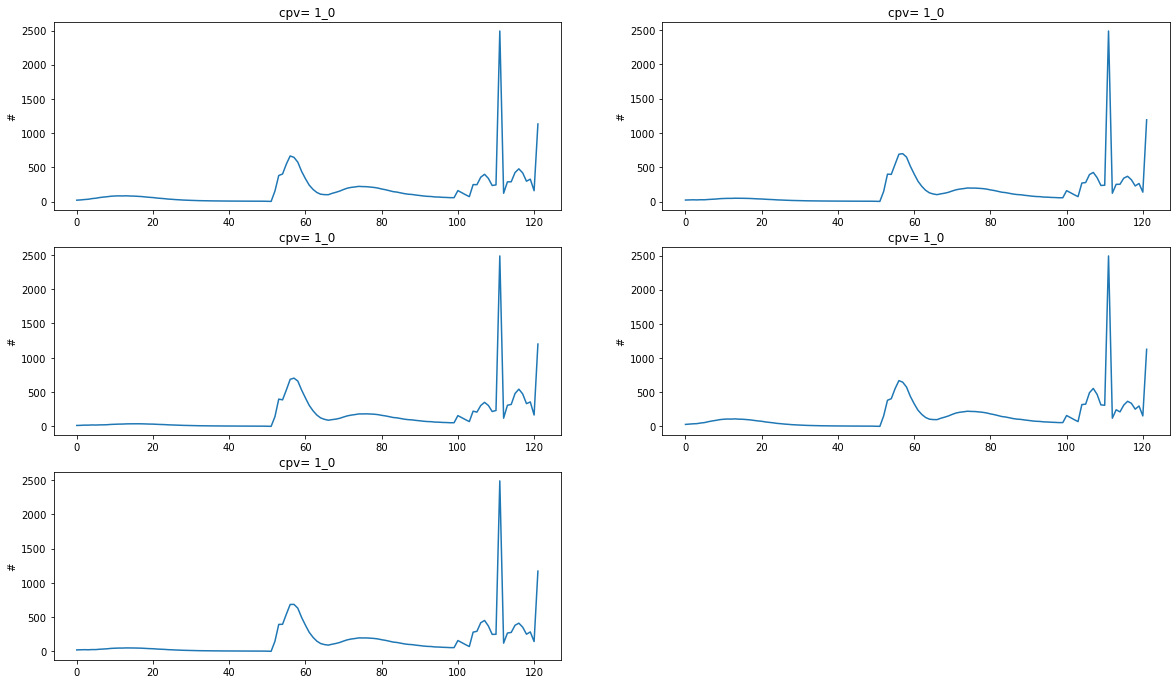

In [19]:
v_test_10 = v_test[index_10]
n = 5
plt.figure(figsize = (20,20))
for i in range(n):    
    plt.subplot(n,2,i+1)
    plt.xlabel('')
    plt.ylabel('#')
    y = v_test_1[i]
    x = range(len(y))
    plt.plot(x,y)
    plt.title('cpv= 1_0')

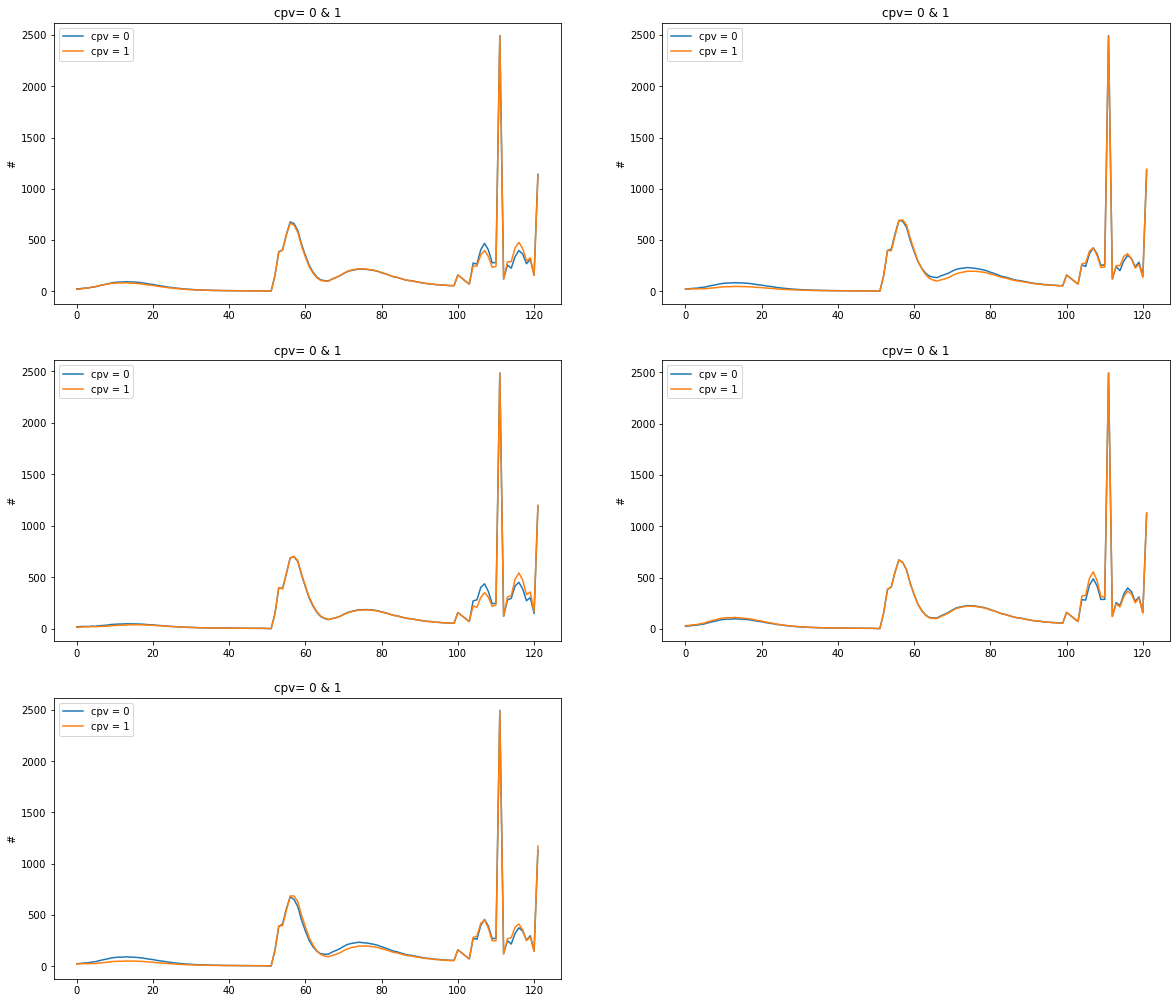

In [20]:
v_test_0 = v_test[cpv_pred_svm == 0]
v_test_1 = v_test[cpv_pred_svm == 1]
n = 5
plt.figure(figsize = (20,30))
for i in range(n):    
    plt.subplot(n,2,i+1)
    plt.xlabel('')
    plt.ylabel('#')
    y0 = v_test_0[i]
    y1 = v_test_1[i]
    x = range(len(y))
    plt.plot(x,y0, label = 'cpv = 0')
    plt.plot(x,y1, label = 'cpv = 1')
    plt.legend()
    plt.title('cpv= 0 & 1')

Training Score:  0.9275555555555556
Testing Score:  0.907


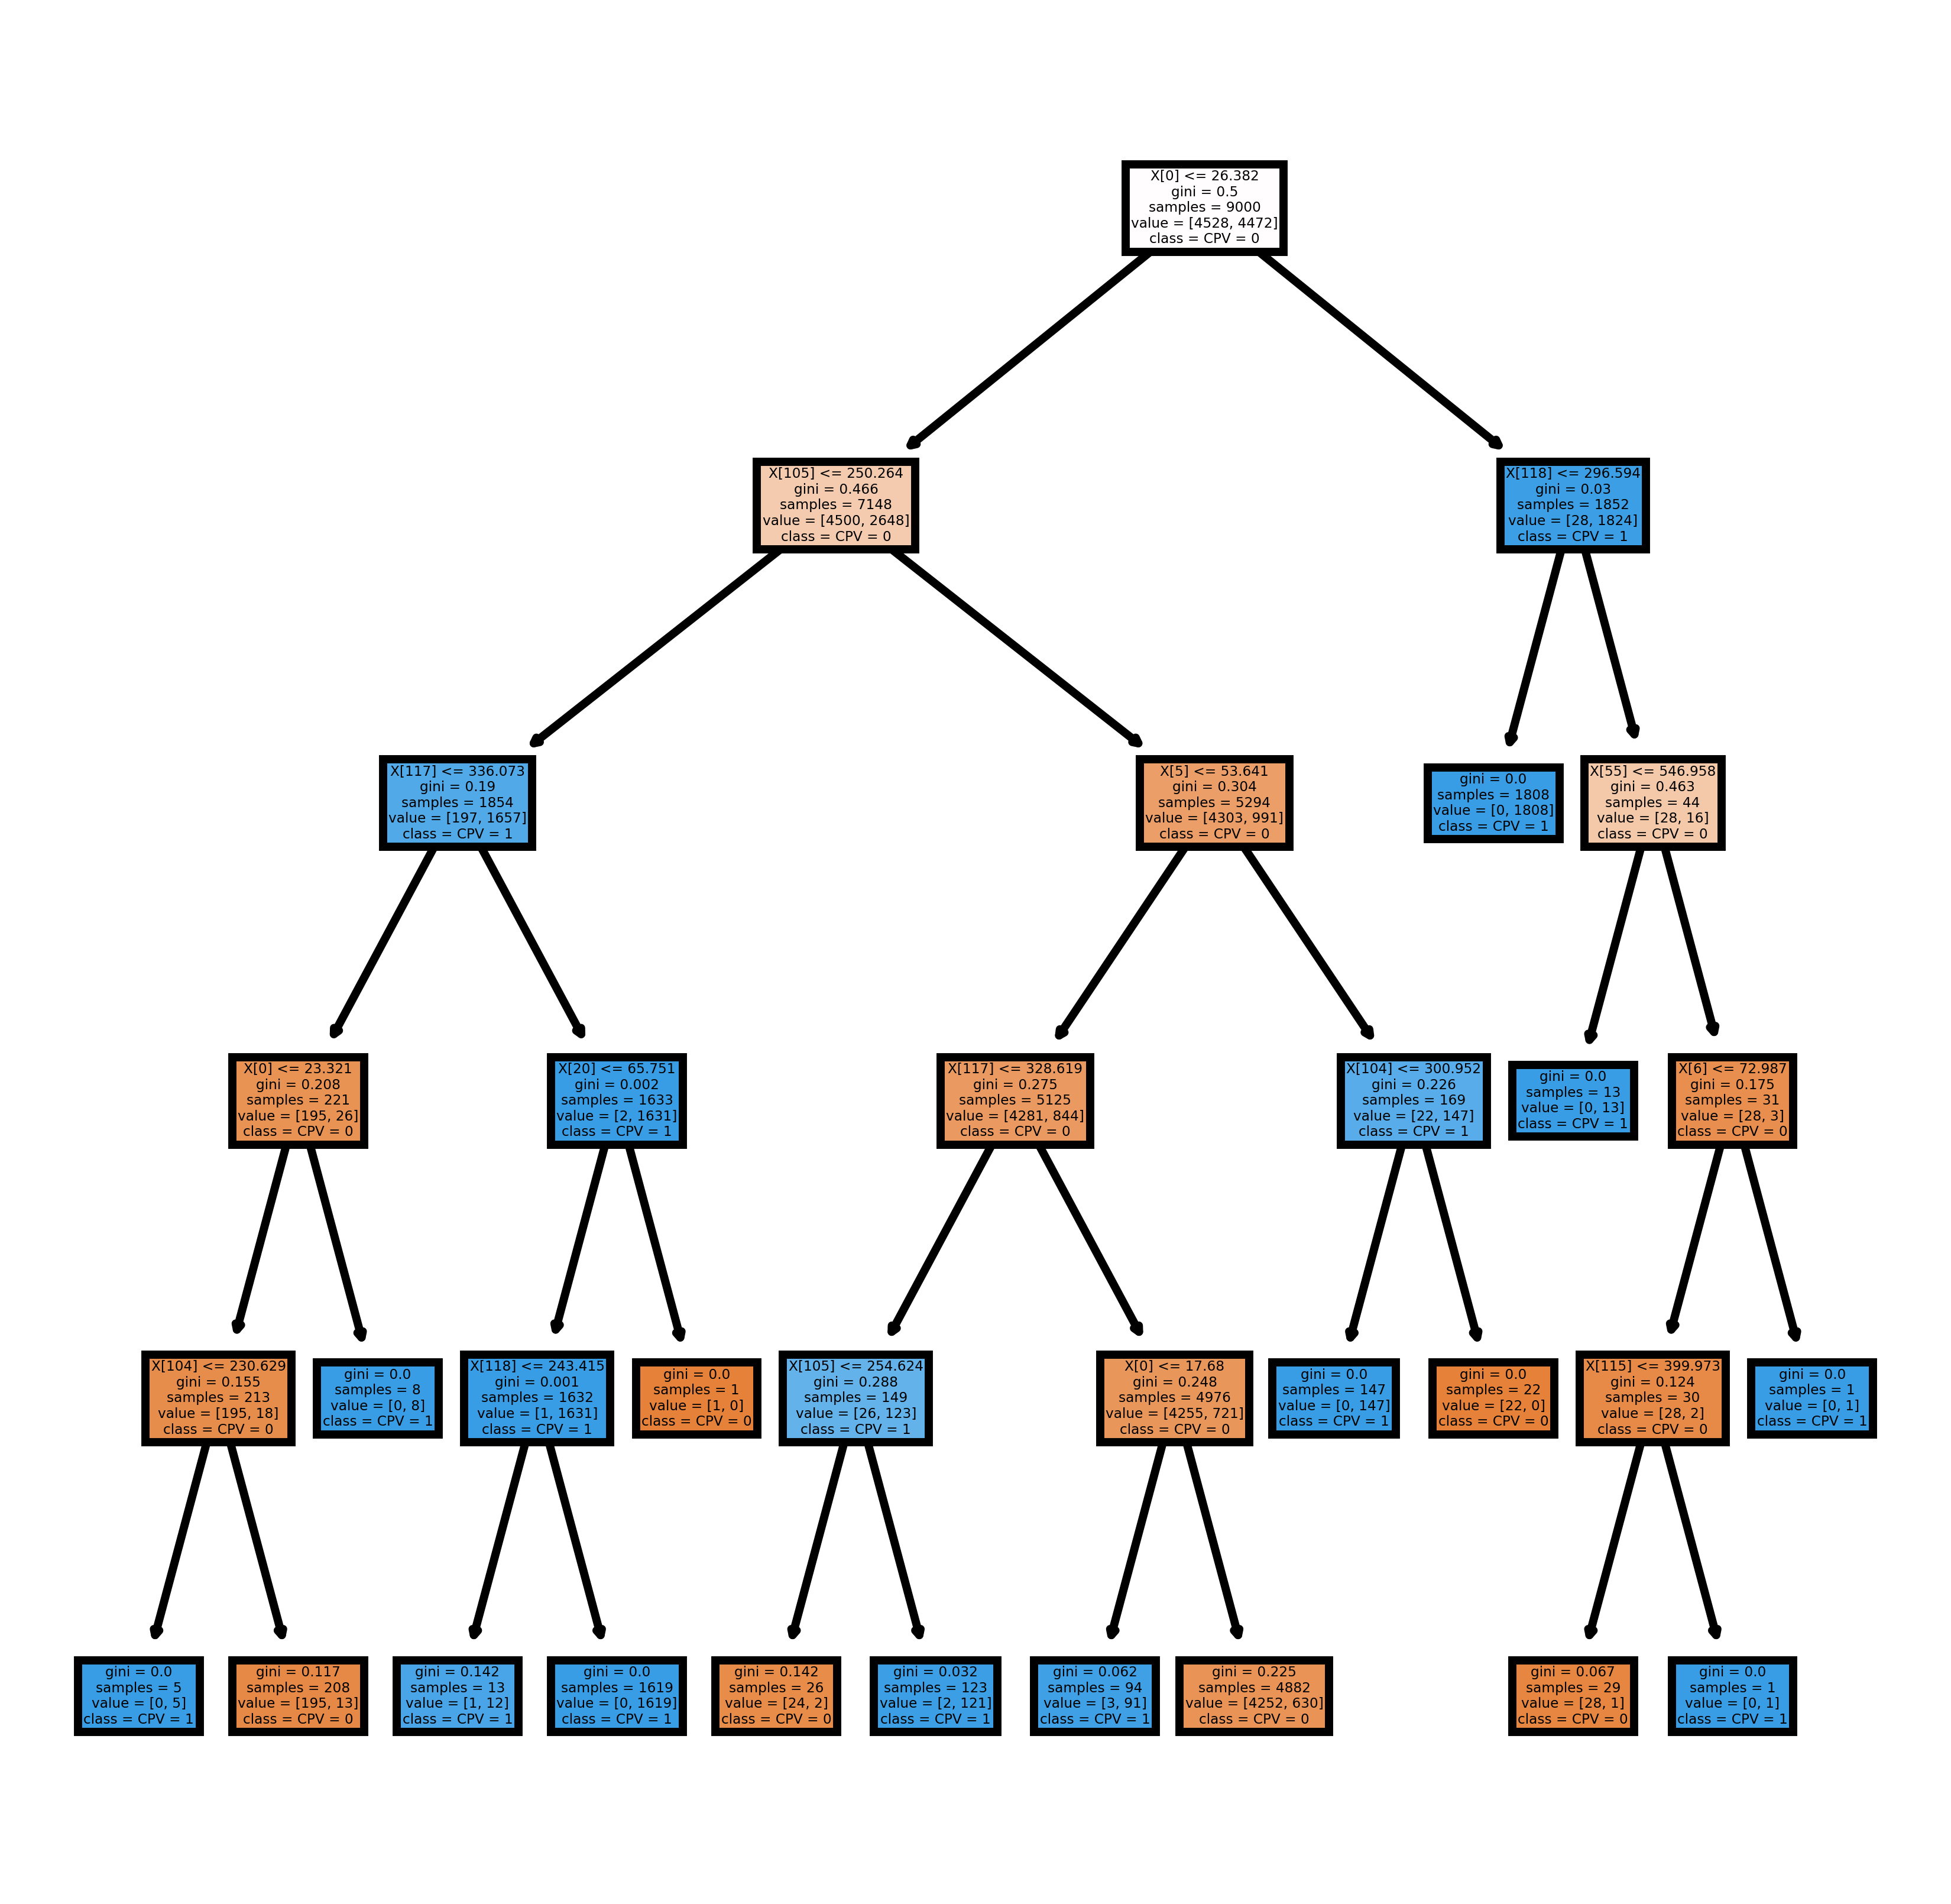

In [21]:

# Decision Tree : Spectrum ve4 & cpv

#Choose Spectrum type
v_train = ve4_train
cpv_train = cpv_train_ve4
v_test = ve4_test
cpv_test = cpv_test_ve4


# tree training
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth = 5)
tree_model.fit(v_train, cpv_train)

classes = ['CPV = 0','CPV = 1']

# Plot tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(tree_model, class_names = classes, filled=True)

# Evaluate model
print('Training Score: ', tree_model.score(v_train,cpv_train))
print('Testing Score: ', tree_model.score(v_test, cpv_test))


Training Score mlp:  0.5031111111111111
Testing Score mlp:  0.509


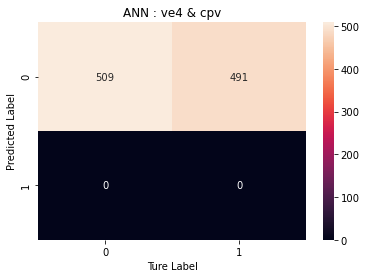

In [37]:
# ANN  ve4 & cpv

#Choose Spectrum type
v_train = ve4_train
cpv_train = cpv_train_ve4
v_test = ve4_test
cpv_test = cpv_test_ve4

# MLP training
iteration = 10000
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(15), activation='tanh', max_iter=iteration, solver='sgd')

model_mlp.fit(v_train, cpv_train)

print('Training Score mlp: ', model_mlp.score(v_train, cpv_train))
print('Testing Score mlp: ', model_mlp.score(v_test, cpv_test))

cpv_pred_mlp = model_mlp.predict(v_test)

import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_mlp = confusion_matrix(cpv_pred_mlp,cpv_test)

sn.heatmap(confusion_matrix_mlp, annot=True, fmt = 'g')
plt.title('ANN : ve4 & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.9386666666666666
Testing Score:  0.93


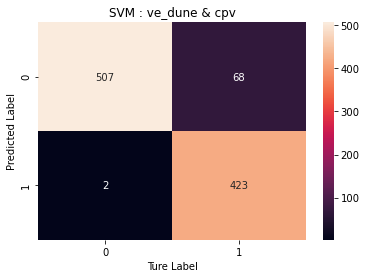

In [23]:
# SVM : Spectrum ve_dune & cpv

#Choose Spectrum type
v_train = ve_dune_train
cpv_train = cpv_train_ve_dune
v_test = ve_dune_test
cpv_test = cpv_test_ve_dune

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : ve_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.8711111111111111
Testing Score:  0.853


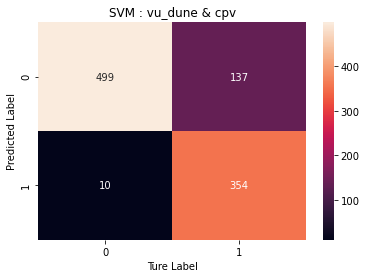

In [24]:
# SVM : Spectrum vu_dune & cpv

#Choose Spectrum type
v_train = vu_dune_train
cpv_train = cpv_train_vu_dune
v_test = vu_dune_test
cpv_test = cpv_test_vu_dune

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : vu_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.9452222222222222
Testing Score:  0.936


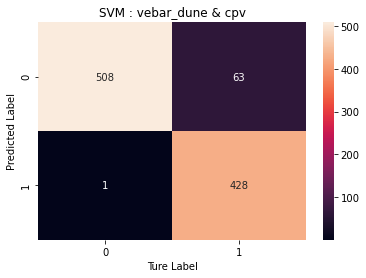

In [25]:
# SVM : Spectrum vebar_dune & cpv

#Choose Spectrum type
v_train = vebar_dune_train
cpv_train = cpv_train_vebar_dune
v_test = vebar_dune_test
cpv_test = cpv_test_vebar_dune

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : vebar_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.8615555555555555
Testing Score:  0.839


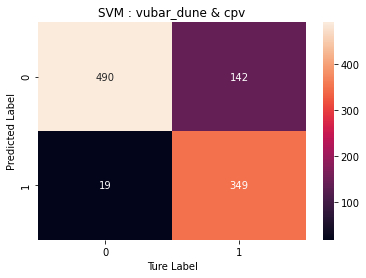

In [26]:
# SVM : Spectrum vubar_dune & cpv

#Choose Spectrum type
v_train = vubar_dune_train
cpv_train = cpv_train_vubar_dune
v_test = vubar_dune_test
cpv_test = cpv_test_vubar_dune

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : vubar_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.9548888888888889
Testing Score:  0.95


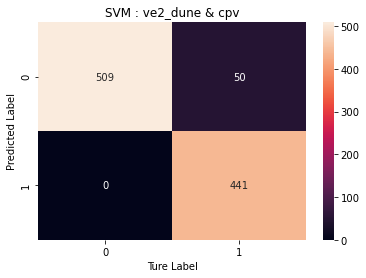

In [27]:
# SVM : Spectrum ve2_dune & cpv

#Choose Spectrum type
v_train = ve2_dune_train
cpv_train = cpv_train_ve2_dune
v_test = ve2_dune_test
cpv_test = cpv_test_ve2_dune

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : ve2_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.8323333333333334
Testing Score:  0.821


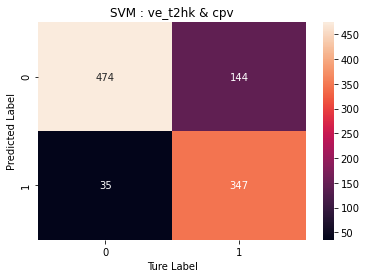

In [28]:
# SVM : Spectrum ve_t2hk & cpv

#Choose Spectrum type
v_train = ve_t2hk_train
cpv_train = cpv_train_ve_t2hk
v_test = ve_t2hk_test
cpv_test = cpv_test_ve_t2hk

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : ve_t2hk & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.6808888888888889
Testing Score:  0.678


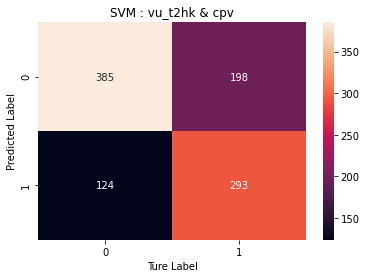

In [29]:
# SVM : Spectrum vu_t2hk & cpv
#Note: Score is low

#Choose Spectrum type
v_train = vu_t2hk_train
cpv_train = cpv_train_vu_t2hk
v_test = vu_t2hk_test
cpv_test = cpv_test_vu_t2hk

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : vu_t2hk & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.8095555555555556
Testing Score:  0.799


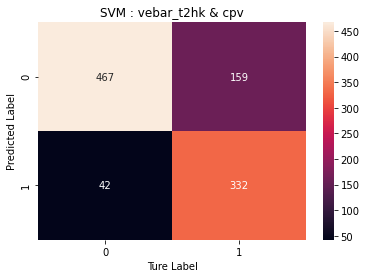

In [30]:
# SVM : Spectrum vebar_t2hk & cpv
#Note: Score is low

#Choose Spectrum type
v_train = vebar_t2hk_train
cpv_train = cpv_train_vebar_t2hk
v_test = vebar_t2hk_test
cpv_test = cpv_test_vebar_t2hk

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : vebar_t2hk & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.7066666666666667
Testing Score:  0.698


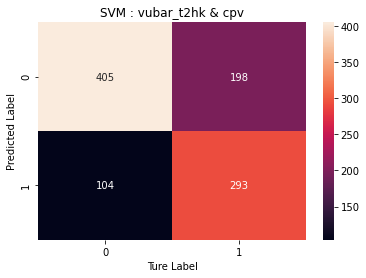

In [31]:
# SVM : Spectrum vubar_t2hk & cpv
#Note: Score is low

#Choose Spectrum type
v_train = vubar_t2hk_train
cpv_train = cpv_train_vubar_t2hk
v_test = vubar_t2hk_test
cpv_test = cpv_test_vubar_t2hk

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : vubar_t2hk & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score mlp:  0.4968888888888889
Testing Score mlp:  0.491


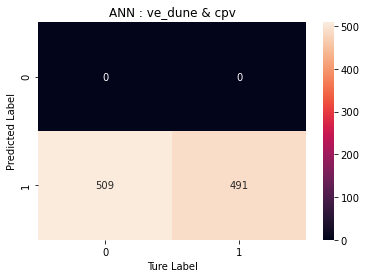

In [32]:
# ANN  ve_dune & cpv

#Choose Spectrum type
v_train = ve_dune_train
cpv_train = cpv_train_ve_dune
v_test = ve_dune_test
cpv_test = cpv_test_ve_dune

# MLP training
iteration = 50000 
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(30), activation='relu', max_iter=iteration, solver='sgd')

model_mlp.fit(v_train, cpv_train)

print('Training Score mlp: ', model_mlp.score(v_train, cpv_train))
print('Testing Score mlp: ', model_mlp.score(v_test, cpv_test))

cpv_pred_mlp = model_mlp.predict(v_test)

import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_mlp = confusion_matrix(cpv_pred_mlp,cpv_test)

sn.heatmap(confusion_matrix_mlp, annot=True, fmt = 'g')
plt.title('ANN : ve_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score mlp:  0.8751111111111111
Testing Score mlp:  0.864


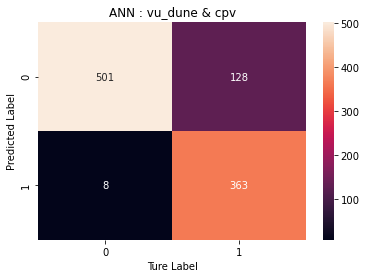

In [33]:
# ANN  vu_dune & cpv

#Choose Spectrum type
v_train = vu_dune_train
cpv_train = cpv_train_vu_dune
v_test = vu_dune_test
cpv_test = cpv_test_vu_dune

# MLP training
iteration = 50000 
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(30), activation='relu', max_iter=iteration, solver='sgd')

model_mlp.fit(v_train, cpv_train)

print('Training Score mlp: ', model_mlp.score(v_train, cpv_train))
print('Testing Score mlp: ', model_mlp.score(v_test, cpv_test))

cpv_pred_mlp = model_mlp.predict(v_test)

import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_mlp = confusion_matrix(cpv_pred_mlp,cpv_test)

sn.heatmap(confusion_matrix_mlp, annot=True, fmt = 'g')
plt.title('ANN : vu_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score mlp:  0.4968888888888889
Testing Score mlp:  0.491


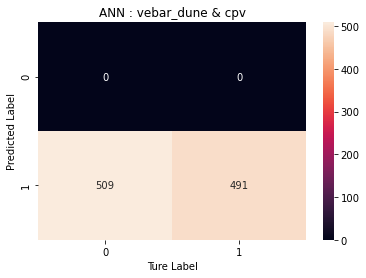

In [34]:
# ANN  vebar_dune & cpv

#Choose Spectrum type
v_train = vebar_dune_train
cpv_train = cpv_train_vebar_dune
v_test = vebar_dune_test
cpv_test = cpv_test_vebar_dune

# MLP training
iteration = 50000 
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(30), activation='relu', max_iter=iteration, solver='sgd')

model_mlp.fit(v_train, cpv_train)

print('Training Score mlp: ', model_mlp.score(v_train, cpv_train))
print('Testing Score mlp: ', model_mlp.score(v_test, cpv_test))

cpv_pred_mlp = model_mlp.predict(v_test)

import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_mlp = confusion_matrix(cpv_pred_mlp,cpv_test)

sn.heatmap(confusion_matrix_mlp, annot=True, fmt = 'g')
plt.title('ANN : vebar_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score mlp:  0.4968888888888889
Testing Score mlp:  0.491


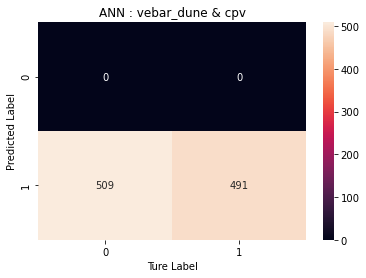

In [35]:
# ANN  vebar_dune & cpv
#Note:???

#Choose Spectrum type
v_train = vebar_dune_train
cpv_train = cpv_train_vebar_dune
v_test = vebar_dune_test
cpv_test = cpv_test_vebar_dune

# MLP training
iteration = 50000 
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(30), activation='relu', max_iter=iteration, solver='sgd')

model_mlp.fit(v_train, cpv_train)

print('Training Score mlp: ', model_mlp.score(v_train, cpv_train))
print('Testing Score mlp: ', model_mlp.score(v_test, cpv_test))

cpv_pred_mlp = model_mlp.predict(v_test)

import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_mlp = confusion_matrix(cpv_pred_mlp,cpv_test)

sn.heatmap(confusion_matrix_mlp, annot=True, fmt = 'g')
plt.title('ANN : vebar_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()